# The Final Challenge Problem

Zed City is a newly established (fictitious) municipality in Tokyo and is made up of 11 districts. <br/> 
Four convenience store ( _konbini_ ) chains A, B, C and D have each established their first store in this new city in non-overlapping districts.
The map (or graph) below shows the 11 districts of Zed City and which district has a konbini already.

Since this map looks different from a conventional one, let us explain how you should look at it once more just in case.<br/>
If you count the number of nodes in this map (or graph), you'll notice that there are 11 of them. So, you should be able to tell that each node in this map (or graph) represents one of the 11 districts of Zed city. The colored nodes are the districts that have konbinis already with each color representing a different konbini chain. In this graph, konbini chain A is represented in Red, B in Blue, C in Yellow and D in Green. Next, you should take notice of the edges that connect these nodes. Any node (district) connected to each other by an edge means that they are districts adjacent to each other.
<img src="./tokyo_map_pic.png" width="700">
As the mayor of Zed City, you want to establish konbinis in the rest of the districts that still don't have one yet.<br/>
Upon your request, all four konbini chains discussed with each other and agreed to establish their konbinis in Zed City under the following two conditions:

**-Only one konbini is allowed in one district.**<br/>
**-No two adjacent districts can have konbinis from the same chain.**<br/>

Can you come up with a plan that satisfies the above conditions? You must provide all store plan combinations that meet the conditions above.<br/>

**For solving this problem:**<br/>
- You must use the 32-qubit simulator as your backend. (i.e. backend = provider.get_backend('ibmq_qasm_simulator'))
- Use **Grover's algorithm** you learned in Week2 & 3 with **iteration ＝ 5.**
- Each konbini chain A, B, C and D should be described (mapped) as **A: $00$、B:$01$、C:$10$、D:$11$**.
- A konbini you are establishing in **district _n_**, should be mapped into classical registers **c[2n]** and **c[2n+1]**.
(For example, let's say you want to establish konbini chain B:$01$ into district n=1. In this case, you should map $0$ and $1$ into classical registers c[2] and c[3].)
- Make sure you **create an oracle** that **doesn't require any knowledge of what the answers are**. (For example, you are not allowed to create an oracle by using a classical optimization solver to get your answers for it.)  
- With the exception of the Unroller, which is required for decomposing your circuit to calculate quantum costs, you are not allowed to use any existing transpiler passes nor original transpilers for making simple simplifications in this competition.
- You are not allowed to use the reset operation (i.e. qc.reset()) in your circuit for this competition.
<br/><br/>
***************************

# Important notes and notations before we begin 

Let's write down the summary of the map of the Zed city in graph notation.

__Vertices:__ \[A, 0, 1, B, 2, 3, 4, C, 5, 6, D\]

__Edges:__ \[(A,0), (A,2), (A,3), (0,1), (0,2), (0,3), (1,B), (1,3), (1,4), (B,4), (2,3), (2,5), (2,6), (2,C), (3,4), (3,5), (3,6), (4,6), (C, D), (5,6), (5,D), (6,D)\]

We will express all 11 nodes in numeric notation for further convenience. Let us map A to 7, B to 8, C to 9, D to 10. So now we have the following graph

__Vertices:__ \[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10\]

__Edges:__ \[(7,0), (7,2), (7,3), (0,1), (0,2), (0,3), (1,8), (1,3), (1,4), (8,4), (2,3), (2,5), (2,6), (2,9), (3,4), (3,5), (3,6), (4,6), (9, 10), (5,6), (5,10), (6,10)\]

We will use two qubits to represent each district. The state of the pair of qubits encodes the konbini code. E.g. if the pair of qubits representing the 4th district is $10$, then there is a konbini store from the chain C in this district.

It looks like to solve the problem we will need to find all the possible ways to partition the graph into 4 groups of vertices, so that there are no edges in each group. Then each group can be used to assign one type of konbini store. In other words, we divide the graph into 4 groups such, that the number of edges going from one group to anuther is exactly equal to the number of edges in the graph (all edges are cut). So, this is basically a vertex coloring problem, where we need to find all possible colorings of the graph with 4 colors, given that 4 vertices have fixed colors.

# Coding the solution
Naively, we need 22 qubits to encode the 11 districts. The last 8 ones will be initialized to reflect the presence of already established konbini stores (A: $00$, B:$01$, C:$10$, D:$11$). To produce all the possible distributions of konbini stores in the rest of districts we will initialize the first 14 qubits in a uniform superposition state.

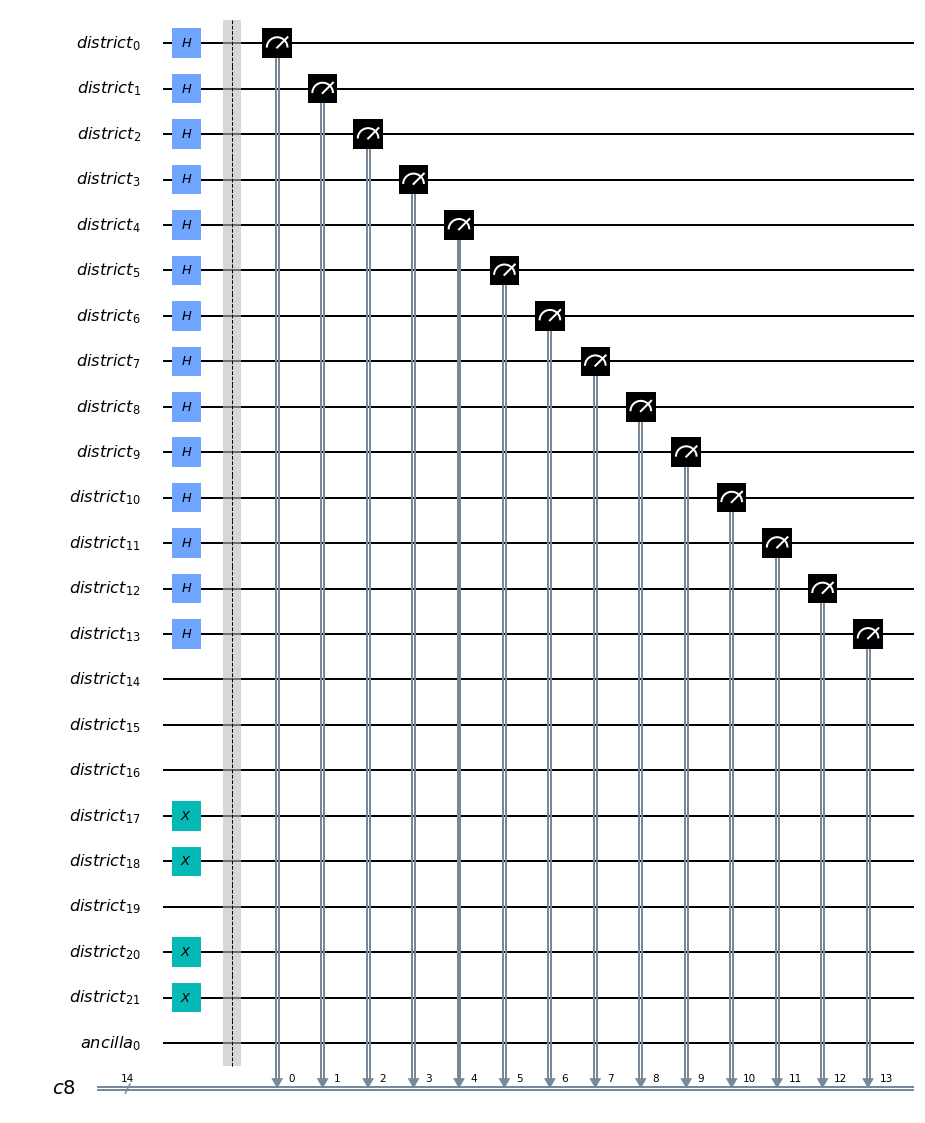

In [11]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit

NUM_ITER = 5

qdistricts = QuantumRegister(22, 'district')
qancilla = QuantumRegister(1, 'ancilla')
creg = ClassicalRegister(14)
qc = QuantumCircuit(qdistricts, qancilla, creg)

# prepare uniform superposition of all possible combinations.
qc.h(qdistricts[0:14])
qc.x(qdistricts[17])
qc.x(qdistricts[18])
qc.x(qdistricts[20])
qc.x(qdistricts[21])
qc.barrier()

for i in range(NUM_ITER):
    # create the oracle
    pass
    # inversion about mean
    pass
    
# measurements
for i in range(14):
    qc.measure(qdistricts[i], creg[i])

qc.draw(output='mpl')